In [1]:
%run ./preprocess_tweets.ipynb

In [2]:
%run ./preprocess_reuters.ipynb

In [ ]:
!yes | conda install -c conda-forge umap-learn

In [3]:
print(split_tweets[0])

['780925634159796224', 'HillaryClinton', 'The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG', 'The question in this election: Who can put the plans into action that will make your life better? token_hyperlink ', ['the', 'question', 'in', 'this', 'election', 'who', 'can', 'put', 'the', 'plans', 'into', 'action', 'that', 'will', 'make', 'your', 'life', 'better', '?', 'token_hyperlink'], ['question', 'election', 'put', 'plan', 'action', 'make', 'life', 'well']]


In [4]:
print(reuters_sent_nostop[0])

[100, ['moody', 'investor', 'service', 'inc', 'say', 'upgrade', 'valero', 'energy', 'corp', 'token_number', 'mln', 'dollar', 'debt']]


In [ ]:
from models import *

tweets_corpus = TaggedDocumentIterator(split_tweets)
tweets_doc3vec = Doc3Vec(tweets_corpus, epochs=250, min_count=1, vector_size=300, window=15, workers=8)
tweets_model = tweets_doc3vec.model
tweets_docvecs = [tweets_model.docvecs[i] for i in range(len(tweets_model.docvecs))]

In [ ]:
reuters_corpus = TaggedDocumentIterator(reuters_sent_nostop)
reuters_doc3vec = Doc3Vec(reuters_corpus, epochs=250, min_count=1, vector_size=300, window=15, workers=8)
reuters_model = reuters_doc3vec.model
reuters_docvecs = [reuters_model.docvecs[i] for i in range(len(reuters_model.docvecs))]

In [ ]:
import pickle

pickle.dump(tweets_model, open('tweets_model.pickle', 'wb'))
pickle.dump(reuters_model, open('reuters_model.pickle', 'wb'))

In [19]:
from sklearn.decomposition import PCA
from umap import UMAP

tweets_matrix = np.matrix(tweets_docvecs)
reuters_matrix = np.matrix(reuters_docvecs)

pca = PCA(n_components = 50)
tweets_pca = pca.fit_transform(tweets_matrix)
reuters_pca = pca.fit_transform(reuters_matrix)

%time tweets_umap = UMAP(n_neighbors = 20, min_dist = 0.5).fit_transform(tweets_pca)
%time reuters_umap = UMAP(n_neighbors = 20, min_dist = 0.5).fit_transform(reuters_pca)

CPU times: user 1min 2s, sys: 6.74 s, total: 1min 9s
Wall time: 59.6 s
CPU times: user 24.8 s, sys: 3.93 s, total: 28.8 s
Wall time: 24.3 s


In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

def plot_umap(title, matrix, color):
    fig = plt.figure(figsize=(15,8))
    plt.suptitle(title, fontsize=14)
    
    plt.scatter(matrix[:, 0], matrix[:, 1], c=color, cmap=plt.cm.Spectral, marker='o', s=(1,1))
    plt.axis('tight')
    
    plt.show()

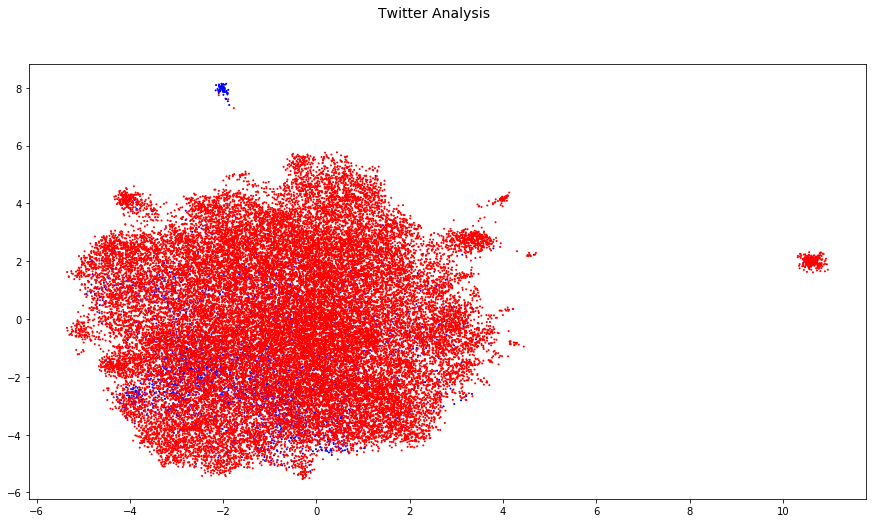

In [21]:
author_map = {'HillaryClinton': 'blue', 'realDonaldTrump': 'red'}
author_color = [author_map[t[1]] for t in split_tweets]

plot_umap('Twitter Analysis', tweets_umap, author_color)